In [21]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [22]:
#fetching data from my drive
import pandas as pd
data=pd.read_csv(r"C:\Users\malik\Downloads\Automobile_insurance_fraud.csv")
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [23]:
#getting information about data type 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [24]:
# describeing data mean ,standard deviation etc
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [25]:
# checking for no of rows and columns
data.shape

(1000, 40)

In [26]:
#checking for null values 
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [27]:
#deleting the data 
data.drop(['_c39'],axis=1,inplace=True)

In [28]:
#data is in form of text changeing to int
pd.get_dummies(data['policy_state'].head())

,IL,IN,OH
0,0,0,1
1,0,1,0
2,0,0,1
3,1,0,0
4,1,0,0


In [29]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [30]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Y','N']])
df1 = ord_encoder.fit_transform(data[['fraud_reported']])
df1

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [31]:
data['fraud_reported']=df1

In [32]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['92x','E400','M5', 'Impreza', 'CRV', 'Civic', '95', 'Grand Cherokee', 'Wrangler', 'X5', 'A5', 'Ultima', 'TL', 'Camry', 'RSX', 'Neon', 'Escape', 'A3', 'Passat', '93', 'X6', 'ML350', 'Tahoe', 'Silverado', 'Malibu', 'F150', 'Highlander', 'Jetta', 'Legacy', 'C300', 'Corolla', 'MDX', 'Accord', 'Pathfinder', 'Maxima', 'Fusion', '3 Series', 'RAM', 'Forrestor']])
df2 = ord_encoder.fit_transform(data[['auto_model']])
df2

array([[ 0.],
       [ 1.],
       [37.],
       [22.],
       [14.],
       [ 6.],
       [33.],
       [10.],
       [13.],
       [ 0.],
       [25.],
       [17.],
       [ 6.],
       [26.],
       [15.],
       [31.],
       [34.],
       [28.],
       [12.],
       [33.],
       [ 3.],
       [14.],
       [38.],
       [37.],
       [16.],
       [16.],
       [13.],
       [38.],
       [15.],
       [12.],
       [30.],
       [25.],
       [36.],
       [ 3.],
       [17.],
       [29.],
       [38.],
       [28.],
       [ 8.],
       [33.],
       [ 2.],
       [ 9.],
       [37.],
       [ 1.],
       [26.],
       [31.],
       [ 5.],
       [17.],
       [18.],
       [29.],
       [33.],
       [ 2.],
       [30.],
       [38.],
       [25.],
       [23.],
       [ 4.],
       [23.],
       [19.],
       [16.],
       [34.],
       [32.],
       [ 2.],
       [28.],
       [16.],
       [15.],
       [10.],
       [20.],
       [10.],
       [25.],
       [17.],
      

In [33]:
data['auto_model']=df2

In [34]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Audi', 'Toyota', 'Accura', 'Ford', 'Volkswagen', 'Jeep', 'Chevrolet', 'Dodge', 'BMW', 'Saab', 'Honda', 'Nissan', 'Suburu', 'Mercedes']])
df3 = ord_encoder.fit_transform(data[['auto_make']])
df3

array([[ 9.],
       [13.],
       [ 7.],
       [ 6.],
       [ 2.],
       [ 9.],
       [11.],
       [ 0.],
       [ 1.],
       [ 9.],
       [ 3.],
       [ 0.],
       [ 9.],
       [ 1.],
       [ 7.],
       [ 2.],
       [11.],
       [12.],
       [ 2.],
       [11.],
       [12.],
       [ 2.],
       [12.],
       [ 7.],
       [ 3.],
       [ 3.],
       [ 1.],
       [12.],
       [ 7.],
       [ 2.],
       [ 1.],
       [ 3.],
       [ 8.],
       [12.],
       [ 0.],
       [13.],
       [12.],
       [12.],
       [ 5.],
       [11.],
       [ 8.],
       [ 8.],
       [ 7.],
       [13.],
       [ 1.],
       [ 2.],
       [10.],
       [ 0.],
       [ 4.],
       [13.],
       [11.],
       [ 8.],
       [ 1.],
       [12.],
       [ 3.],
       [ 6.],
       [10.],
       [ 6.],
       [ 9.],
       [ 3.],
       [11.],
       [10.],
       [ 8.],
       [12.],
       [ 3.],
       [ 7.],
       [ 0.],
       [ 8.],
       [ 0.],
       [ 3.],
       [ 0.],
      

In [35]:
data['auto_make']=df3

In [36]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['YES', 'NO', '?']])
df4 = ord_encoder.fit_transform(data[['police_report_available']])
df4

array([[0.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],

In [37]:
data['police_report_available']=df4  

In [38]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['YES', 'NO', '?']])
df5 = ord_encoder.fit_transform(data[['property_damage']])
df5

array([[0.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],

In [39]:
data['property_damage']=df5  

In [40]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Springfield', 'Northbend', 'Columbus', 'Hillsdale', 'Riverwood', 'Arlington', 'Northbrook']])
df6 = ord_encoder.fit_transform(data[['incident_city']])
df6

array([[2.],
       [4.],
       [2.],
       [5.],
       [5.],
       [5.],
       [0.],
       [2.],
       [5.],
       [3.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [3.],
       [4.],
       [1.],
       [6.],
       [2.],
       [2.],
       [5.],
       [3.],
       [1.],
       [4.],
       [5.],
       [5.],
       [6.],
       [1.],
       [6.],
       [2.],
       [4.],
       [5.],
       [3.],
       [3.],
       [0.],
       [6.],
       [5.],
       [3.],
       [2.],
       [2.],
       [6.],
       [0.],
       [5.],
       [0.],
       [5.],
       [1.],
       [5.],
       [5.],
       [0.],
       [4.],
       [5.],
       [1.],
       [2.],
       [1.],
       [5.],
       [2.],
       [4.],
       [4.],
       [3.],
       [0.],
       [0.],
       [3.],
       [1.],
       [4.],
       [5.],
       [0.],
       [3.],
       [6.],
       [4.],
       [3.],
       [6.],
       [5.],
       [4.],
       [0.],
       [4.],
       [0.],

In [41]:
data['incident_city']=df6

In [42]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['OH', 'WV', 'NY', 'SC', 'PA', 'NC', 'VA']])
df7 = ord_encoder.fit_transform(data[['incident_state']])
df7

array([[3.],
       [6.],
       [2.],
       [0.],
       [2.],
       [3.],
       [2.],
       [6.],
       [1.],
       [5.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [1.],
       [2.],
       [1.],
       [2.],
       [6.],
       [2.],
       [3.],
       [3.],
       [1.],
       [6.],
       [0.],
       [4.],
       [6.],
       [3.],
       [3.],
       [3.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [5.],
       [1.],
       [1.],
       [3.],
       [5.],
       [3.],
       [2.],
       [5.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],
       [5.],
       [6.],
       [2.],
       [3.],
       [6.],
       [1.],
       [6.],
       [2.],
       [0.],
       [1.],
       [1.],
       [6.],
       [2.],
       [3.],
       [1.],
       [1.],
       [5.],
       [3.],
       [1.],
       [5.],
       [3.],
       [6.],
       [3.],
       [2.],

In [43]:
data['incident_state']=df7

In [44]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['IL', 'IN', 'OH']])
df8 = ord_encoder.fit_transform(data[['policy_state']])
df8

array([[2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [1.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [2.],
       [2.],

In [45]:
data['policy_state']=df8

In [46]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['100/300', '250/500', '500/1000']])
df9 = ord_encoder.fit_transform(data[['policy_csl']])
df9

array([[1.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [2.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [2.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [2.],

In [47]:
data['policy_csl']=df9

In [48]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['MALE', 'FEMALE']])
df10 = ord_encoder.fit_transform(data[['insured_sex']])
df10

array([[0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [49]:
data['insured_sex']=df10

In [50]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['JD', 'College', 'High School', 'MD', 'PhD', 'Masters', 'Associate']])
df11 = ord_encoder.fit_transform(data[['insured_education_level']])
df11

array([[3.],
       [3.],
       [4.],
       [4.],
       [6.],
       [4.],
       [4.],
       [6.],
       [4.],
       [4.],
       [5.],
       [2.],
       [3.],
       [3.],
       [1.],
       [3.],
       [1.],
       [2.],
       [3.],
       [2.],
       [0.],
       [6.],
       [2.],
       [3.],
       [1.],
       [5.],
       [2.],
       [0.],
       [0.],
       [4.],
       [5.],
       [0.],
       [6.],
       [2.],
       [4.],
       [2.],
       [5.],
       [0.],
       [3.],
       [0.],
       [6.],
       [6.],
       [1.],
       [4.],
       [0.],
       [3.],
       [6.],
       [1.],
       [4.],
       [5.],
       [3.],
       [0.],
       [1.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [4.],
       [3.],
       [4.],
       [0.],
       [2.],
       [0.],
       [4.],
       [3.],
       [2.],
       [6.],
       [3.],
       [3.],
       [6.],
       [3.],
       [6.],
       [1.],
       [6.],
       [2.],
       [1.],

In [51]:
data['insured_education_level']=df11

In [52]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['protective-serv', 'tech-support', 'sales', 'armed-forces', 'prof-specialty', 'priv-house-serv', 'adm-clerical', 'exec-managerial', 'handlers-cleaners', 'farming-fishing', 'transport-moving', 'machine-op-inspct', 'other-service', 'craft-repair']])
df12 = ord_encoder.fit_transform(data[['insured_occupation']])
df12

array([[13.],
       [11.],
       [ 2.],
       [ 3.],
       [ 2.],
       [ 1.],
       [ 4.],
       [ 1.],
       [12.],
       [ 5.],
       [ 7.],
       [ 7.],
       [ 0.],
       [ 3.],
       [11.],
       [10.],
       [11.],
       [11.],
       [13.],
       [ 8.],
       [12.],
       [11.],
       [ 4.],
       [ 5.],
       [13.],
       [ 2.],
       [ 4.],
       [ 7.],
       [ 2.],
       [11.],
       [ 4.],
       [13.],
       [ 6.],
       [ 9.],
       [ 4.],
       [13.],
       [ 0.],
       [ 5.],
       [13.],
       [ 1.],
       [ 1.],
       [10.],
       [ 4.],
       [10.],
       [ 5.],
       [ 0.],
       [12.],
       [12.],
       [ 0.],
       [ 7.],
       [12.],
       [ 9.],
       [ 3.],
       [ 5.],
       [11.],
       [13.],
       [ 4.],
       [ 6.],
       [12.],
       [ 6.],
       [11.],
       [ 8.],
       [ 3.],
       [10.],
       [ 2.],
       [ 7.],
       [ 1.],
       [ 6.],
       [11.],
       [12.],
       [ 4.],
      

In [53]:
data['insured_occupation']=df12

In [54]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['unmarried', 'own-child', 'wife', 'husband', 'other-relative', 'not-in-family']])
df13 = ord_encoder.fit_transform(data[['insured_relationship']])
df13

array([[3.],
       [4.],
       [1.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.],
       [2.],
       [4.],
       [4.],
       [2.],
       [2.],
       [5.],
       [4.],
       [1.],
       [0.],
       [4.],
       [1.],
       [1.],
       [1.],
       [4.],
       [1.],
       [3.],
       [1.],
       [1.],
       [5.],
       [5.],
       [0.],
       [3.],
       [3.],
       [4.],
       [2.],
       [1.],
       [5.],
       [0.],
       [0.],
       [0.],
       [2.],
       [5.],
       [0.],
       [3.],
       [1.],
       [0.],
       [3.],
       [3.],
       [3.],
       [4.],
       [2.],
       [1.],
       [3.],
       [5.],
       [3.],
       [5.],
       [5.],
       [0.],
       [1.],
       [3.],
       [1.],
       [4.],
       [3.],
       [0.],
       [1.],
       [5.],
       [4.],
       [5.],
       [0.],
       [1.],
       [1.],
       [1.],
       [5.],
       [3.],
       [5.],
       [2.],
       [4.],
       [3.],

In [55]:
data['insured_relationship']=df13

In [56]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,2.0,1.0,1000,1406.91,0,466132,...,2,0.0,71610,6510,13020,52080,9.0,0.0,2004,0.0
1,228,42,342868,27-06-2006,1.0,1.0,2000,1197.22,5000000,468176,...,0,2.0,5070,780,780,3510,13.0,1.0,2007,0.0
2,134,29,687698,06-09-2000,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,7.0,37.0,2007,1.0
3,256,41,227811,25-05-1990,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,6.0,22.0,2014,0.0
4,228,44,367455,06-06-2014,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,2.0,14.0,2009,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,2.0,2.0,1000,1310.80,0,431289,...,1,2.0,87200,17440,8720,61040,10.0,32.0,2006,1.0
996,285,41,186934,05-01-2014,0.0,0.0,1000,1436.79,0,608177,...,3,2.0,108480,18080,18080,72320,4.0,18.0,2015,1.0
997,130,34,918516,17-02-2003,2.0,1.0,500,1383.49,3000000,442797,...,3,0.0,67500,7500,7500,52500,12.0,3.0,1996,1.0
998,458,62,533940,18-11-2011,0.0,2.0,2000,1356.92,5000000,441714,...,1,0.0,46980,5220,5220,36540,0.0,10.0,1998,1.0


In [57]:
#checking datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   float64
 5   policy_csl                   1000 non-null   float64
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   float64
 11  insured_education_level      1000 non-null   float64
 12  insured_occupation           1000 non-null   float64
 13  insured_hobbies    

In [58]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Vehicle Theft', 'Multi-vehicle Collision', 'Parked Car', 'Single Vehicle Collision']])
df14 = ord_encoder.fit_transform(data[['incident_type']])
df14

array([[3.],
       [0.],
       [1.],
       [3.],
       [0.],
       [1.],
       [1.],
       [1.],
       [3.],
       [3.],
       [3.],
       [1.],
       [3.],
       [2.],
       [3.],
       [1.],
       [1.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [3.],
       [1.],
       [2.],
       [0.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.],
       [3.],
       [3.],
       [3.],
       [2.],
       [1.],
       [3.],
       [3.],
       [3.],
       [1.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [0.],
       [3.],
       [1.],
       [0.],
       [0.],
       [1.],
       [2.],
       [3.],
       [1.],
       [2.],
       [3.],
       [1.],
       [1.],
       [1.],
       [3.],
       [1.],
       [1.],
       [1.],
       [3.],
       [1.],
       [3.],
       [2.],
       [1.],
       [3.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.],

In [59]:
data['incident_type']=df14

In [60]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['?', 'Rear Collision', 'Side Collision', 'Front Collision']])
df15 = ord_encoder.fit_transform(data[['collision_type']])
df15

array([[2.],
       [0.],
       [1.],
       [3.],
       [0.],
       [1.],
       [3.],
       [3.],
       [3.],
       [1.],
       [3.],
       [3.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [3.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [3.],
       [3.],
       [2.],
       [3.],
       [1.],
       [0.],
       [1.],
       [3.],
       [1.],
       [2.],
       [2.],
       [1.],
       [3.],
       [1.],
       [1.],
       [3.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [3.],
       [0.],
       [3.],
       [2.],
       [1.],
       [2.],
       [2.],
       [3.],
       [1.],
       [3.],
       [2.],
       [2.],
       [3.],
       [0.],
       [2.],
       [3.],
       [1.],
       [1.],
       [2.],
       [3.],
       [3.],

In [61]:
data['incident_type']=df15

In [62]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Total Loss', 'Trivial Damage', 'Major Damage', 'Minor Damage']])
df16 = ord_encoder.fit_transform(data[['incident_severity']])
df16

array([[2.],
       [3.],
       [3.],
       [2.],
       [3.],
       [2.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.],
       [2.],
       [0.],
       [3.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [3.],
       [0.],
       [2.],
       [0.],
       [3.],
       [2.],
       [3.],
       [3.],
       [3.],
       [3.],
       [2.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [0.],
       [3.],
       [2.],
       [2.],
       [3.],
       [2.],
       [3.],
       [0.],
       [3.],
       [0.],
       [0.],
       [2.],
       [1.],
       [0.],
       [3.],
       [1.],
       [3.],
       [2.],
       [3.],
       [3.],
       [2.],
       [3.],
       [0.],
       [3.],
       [2.],
       [0.],
       [3.],
       [2.],
       [0.],
       [3.],
       [3.],
       [3.],
       [2.],
       [3.],
       [2.],
       [0.],
       [3.],
       [3.],
       [3.],
       [0.],
       [3.],

In [63]:
data['incident_severity']=df16

In [64]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Police', 'Fire', 'Ambulance', 'Other', 'None']])
df17 = ord_encoder.fit_transform(data[['authorities_contacted']])
df17

array([[0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.],
       [2.],
       [4.],
       [0.],
       [3.],
       [3.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [2.],
       [2.],
       [3.],
       [3.],
       [0.],
       [4.],
       [3.],
       [0.],
       [2.],
       [0.],
       [0.],
       [2.],
       [1.],
       [3.],
       [0.],
       [4.],
       [0.],
       [2.],
       [2.],
       [0.],
       [3.],
       [3.],
       [3.],
       [3.],
       [1.],
       [1.],
       [0.],
       [3.],
       [1.],
       [4.],
       [4.],
       [0.],
       [0.],
       [1.],
       [1.],
       [4.],
       [2.],
       [0.],
       [0.],
       [3.],
       [3.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [2.],
       [4.],
       [3.],
       [3.],
       [2.],
       [1.],
       [2.],
       [2.],
       [1.],

In [65]:
data['authorities_contacted']=df17

In [66]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['video-games', 'hiking', 'skydiving', 'paintball', 'polo', 'golf', 'camping', 'yachting', 'reading', 'bungie-jumping', 'cross-fit', 'movies', 'board-games', 'chess', 'base-jumping', 'dancing', 'basketball', 'sleeping', 'kayaking', 'exercise']])
df18 = ord_encoder.fit_transform(data[['insured_hobbies']])
df18

array([[17.],
       [ 8.],
       [12.],
       [12.],
       [12.],
       [ 9.],
       [12.],
       [14.],
       [ 5.],
       [ 6.],
       [15.],
       [ 2.],
       [ 8.],
       [ 9.],
       [12.],
       [11.],
       [ 1.],
       [ 8.],
       [ 7.],
       [ 6.],
       [ 9.],
       [ 2.],
       [ 3.],
       [13.],
       [18.],
       [ 4.],
       [ 5.],
       [13.],
       [18.],
       [16.],
       [ 0.],
       [ 8.],
       [ 7.],
       [ 0.],
       [ 7.],
       [ 8.],
       [ 6.],
       [ 5.],
       [ 9.],
       [ 0.],
       [18.],
       [13.],
       [ 1.],
       [ 8.],
       [ 8.],
       [ 7.],
       [ 4.],
       [18.],
       [15.],
       [11.],
       [ 9.],
       [ 4.],
       [16.],
       [11.],
       [11.],
       [ 2.],
       [13.],
       [ 1.],
       [ 7.],
       [18.],
       [14.],
       [16.],
       [ 9.],
       [ 0.],
       [13.],
       [13.],
       [ 3.],
       [ 8.],
       [11.],
       [18.],
       [17.],
      

In [67]:
data['insured_hobbies']=df18

In [68]:
#encoding into numeric 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['?', 'Rear Collision', 'Side Collision', 'Front Collision']])
df19 = ord_encoder.fit_transform(data[['collision_type']])
df19

array([[2.],
       [0.],
       [1.],
       [3.],
       [0.],
       [1.],
       [3.],
       [3.],
       [3.],
       [1.],
       [3.],
       [3.],
       [1.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [2.],
       [1.],
       [3.],
       [1.],
       [1.],
       [0.],
       [0.],
       [2.],
       [1.],
       [2.],
       [2.],
       [3.],
       [3.],
       [2.],
       [3.],
       [1.],
       [0.],
       [1.],
       [3.],
       [1.],
       [2.],
       [2.],
       [1.],
       [3.],
       [1.],
       [1.],
       [3.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [3.],
       [0.],
       [3.],
       [2.],
       [1.],
       [2.],
       [2.],
       [3.],
       [1.],
       [3.],
       [2.],
       [2.],
       [3.],
       [0.],
       [2.],
       [3.],
       [1.],
       [1.],
       [2.],
       [3.],
       [3.],

In [69]:
data['collision_type']=df19

In [70]:
# droping columns based on above result
data.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   float64
 3   policy_csl                   1000 non-null   float64
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   float64
 9   insured_education_level      1000 non-null   float64
 10  insured_hobbies              1000 non-null   float64
 11  insured_relationship         1000 non-null   float64
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

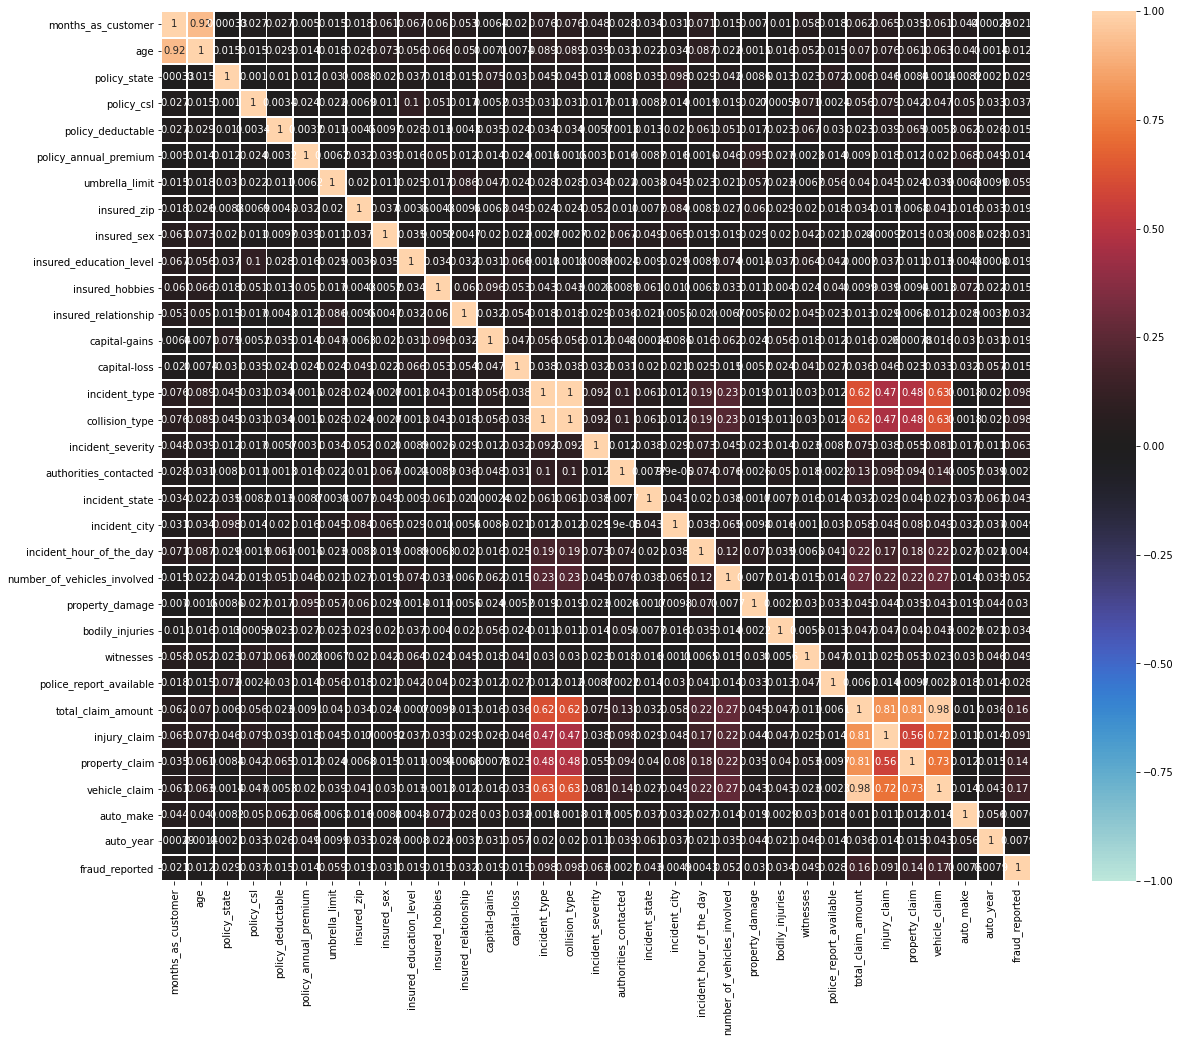

In [72]:
#heat map for corelation checking
df_corr =data.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,  vmin=-1,annot=True,
           square=True,center=0,fmt='.2g',linewidths=1,)
plt.tight_layout

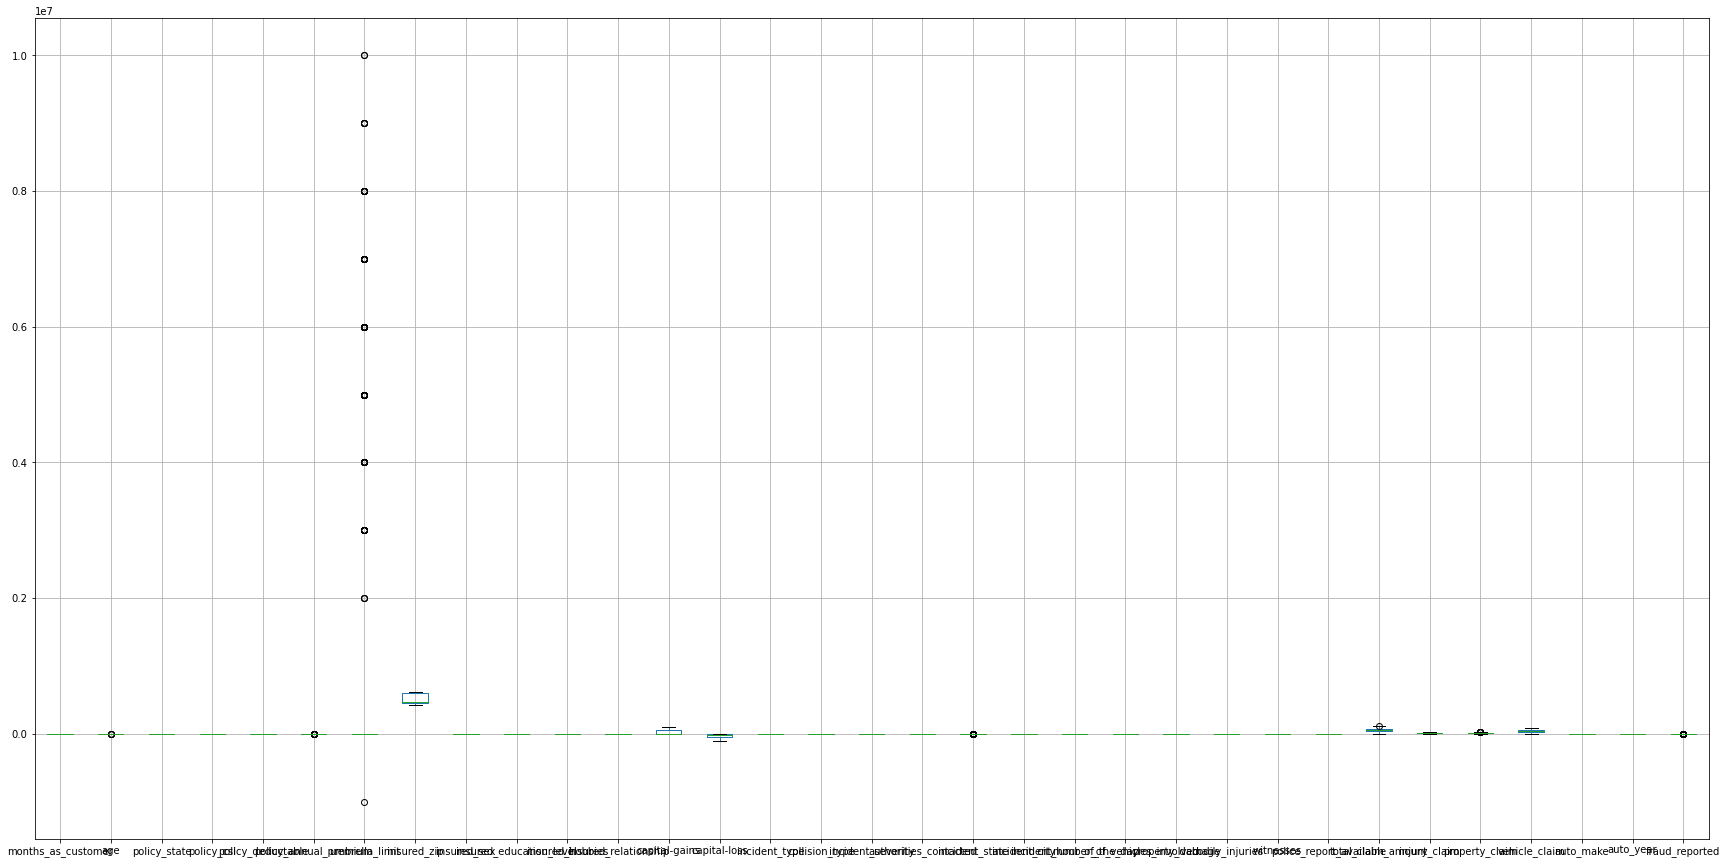

In [73]:
# plotting boxplot to identify outliers
data.boxplot(figsize=[30,30])
plt.subplots_adjust(bottom=0.5)
plt.show()

In [76]:
#removing outliers
from scipy import stats
from scipy.stats import zscore

z_score = zscore(data[['umbrella_limit']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score <3).all(axis=1)

data=data[filtering_entry]
data.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,9.850000e+02,985.000000,985.000000,985.000000,...,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.00000
mean,204.090355,38.939086,1.019289,0.948223,1136.548223,1256.070924,9.868020e+05,500861.588832,0.536041,2.965482,...,0.996954,1.488325,1.023350,52741.857868,7437.025381,7405.238579,37899.593909,6.570558,2005.129949,0.75533
std,115.452912,9.178799,0.830463,0.804181,611.030271,245.278729,2.116723e+06,71498.263661,0.498953,2.027962,...,0.818356,1.113533,0.809285,26365.005391,4887.199660,4818.520879,18851.660125,4.016145,6.019731,0.43011
min,0.000000,19.000000,0.000000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,0.000000,1995.000000,0.00000
25%,116.000000,32.000000,0.000000,0.000000,500.000000,1086.210000,0.000000e+00,448436.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,41700.000000,4280.000000,4490.000000,30240.000000,3.000000,2000.000000,1.00000
50%,199.000000,38.000000,1.000000,1.000000,1000.000000,1257.040000,0.000000e+00,466393.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,57900.000000,6770.000000,6750.000000,42080.000000,7.000000,2005.000000,1.00000
75%,277.000000,44.000000,2.000000,2.000000,2000.000000,1415.740000,0.000000e+00,603195.000000,1.000000,5.000000,...,2.000000,2.000000,2.000000,70510.000000,11300.000000,10880.000000,50750.000000,10.000000,2010.000000,1.00000
max,479.000000,64.000000,2.000000,2.000000,2000.000000,2047.590000,7.000000e+06,620962.000000,1.000000,6.000000,...,2.000000,3.000000,2.000000,114920.000000,21450.000000,23670.000000,79560.000000,13.000000,2015.000000,1.00000


In [77]:
data.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,2.0,1.0,1000,1406.91,0,466132,0.0,3.0,...,1,2,0.0,71610,6510,13020,52080,9.0,2004,0.0
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,0.0,3.0,...,0,0,2.0,5070,780,780,3510,13.0,2007,0.0
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,1.0,4.0,...,2,3,1.0,34650,7700,3850,23100,7.0,2007,1.0
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,1.0,4.0,...,1,2,1.0,63400,6340,6340,50720,6.0,2014,0.0
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,0.0,6.0,...,0,1,1.0,6500,1300,650,4550,2.0,2009,1.0


In [78]:
# checking for skewed data 
data.skew()

months_as_customer             0.365896
age                            0.480506
policy_state                  -0.036054
policy_csl                     0.093953
policy_deductable              0.478157
policy_annual_premium          0.007310
umbrella_limit                 1.809619
insured_zip                    0.829416
insured_sex                   -0.144759
insured_education_level        0.022112
insured_hobbies                0.102682
insured_relationship          -0.037399
capital-gains                  0.466050
capital-loss                  -0.388917
incident_type                 -0.081231
collision_type                -0.081231
incident_severity             -0.361881
authorities_contacted          0.313736
incident_state                 0.610186
incident_city                  0.058335
incident_hour_of_the_day      -0.034538
number_of_vehicles_involved    0.509302
property_damage               -0.108209
bodily_injuries                0.005614
witnesses                      0.018336


In [79]:
#removing skewness
from sklearn.preprocessing import power_transform
df_new=power_transform(data)

df_new=pd.DataFrame(df_new,columns=data.columns)

In [80]:
df_new.skew()

months_as_customer            -0.135287
age                           -0.001792
policy_state                  -0.149844
policy_csl                    -0.098777
policy_deductable              0.022727
policy_annual_premium          0.003887
umbrella_limit                -7.967493
insured_zip                    0.673178
insured_sex                   -0.144759
insured_education_level       -0.191541
insured_hobbies               -0.203040
insured_relationship          -0.189279
capital-gains                  0.025271
capital-loss                   0.090185
incident_type                 -0.164858
collision_type                -0.164858
incident_severity             -0.339239
authorities_contacted         -0.080912
incident_state                -0.016290
incident_city                 -0.178988
incident_hour_of_the_day      -0.257220
number_of_vehicles_involved    0.372998
property_damage               -0.179229
bodily_injuries               -0.132931
witnesses                     -0.154272


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

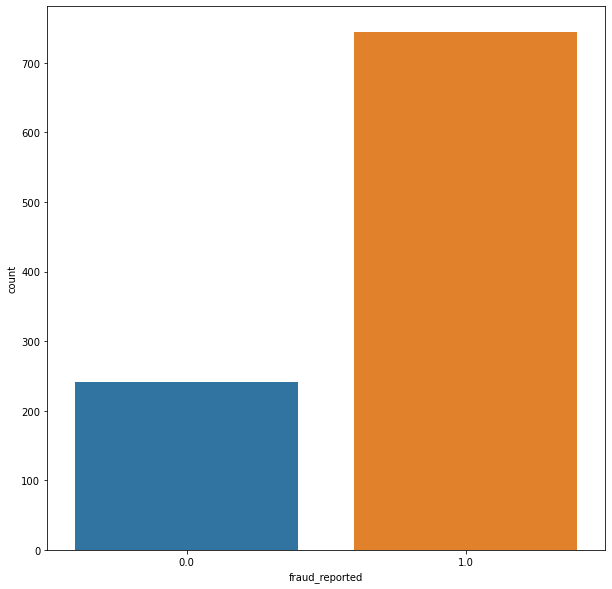

In [81]:
#checking for imbalance
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='fraud_reported',data=data)

In [82]:
#splitting data
y=data['fraud_reported']

x=data.drop(columns=['fraud_reported'])

In [83]:
#offerfitting problem
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over = SM.fit_resample(x,y)

In [85]:
y_over.value_counts()

1.0    744
0.0    744
Name: fraud_reported, dtype: int64

In [62]:
x

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year
0,328,48,2.0,1.0,1000,1406.91,0,466132,0.0,3.0,...,0.0,1,2,0.0,71610,6510,13020,52080,9.0,2004
1,228,42,1.0,1.0,2000,1197.22,5000000,468176,0.0,3.0,...,2.0,0,0,2.0,5070,780,780,3510,13.0,2007
2,134,29,2.0,0.0,2000,1413.14,5000000,430632,1.0,4.0,...,1.0,2,3,1.0,34650,7700,3850,23100,7.0,2007
3,256,41,0.0,1.0,2000,1415.74,6000000,608117,1.0,4.0,...,2.0,1,2,1.0,63400,6340,6340,50720,6.0,2014
4,228,44,0.0,2.0,1000,1583.91,6000000,610706,0.0,6.0,...,1.0,0,1,1.0,6500,1300,650,4550,2.0,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,0,431289,1.0,5.0,...,0.0,0,1,2.0,87200,17440,8720,61040,10.0,2006
996,285,41,0.0,0.0,1000,1436.79,0,608177,1.0,4.0,...,0.0,2,3,2.0,108480,18080,18080,72320,4.0,2015
997,130,34,2.0,1.0,500,1383.49,3000000,442797,1.0,5.0,...,2.0,2,3,0.0,67500,7500,7500,52500,12.0,1996
998,458,62,0.0,2.0,2000,1356.92,5000000,441714,0.0,6.0,...,2.0,0,1,0.0,46980,5220,5220,36540,0.0,1998


In [63]:
y

0      0.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: fraud_reported, Length: 1000, dtype: float64

In [86]:
#trainning data
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25)

In [87]:
#agorithm use to predict the model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [88]:
y_pred=log_reg.predict(x_test)

In [89]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.5483870967741935

In [90]:
#agorithm use to predict the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

In [91]:
print(accuracy_score(y_test,predrf))

0.8736559139784946


In [92]:
print(confusion_matrix(y_test,predrf))

[[160  37]
 [ 10 165]]


In [93]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       197
         1.0       0.82      0.94      0.88       175

    accuracy                           0.87       372
   macro avg       0.88      0.88      0.87       372
weighted avg       0.88      0.87      0.87       372



In [94]:
#using dtc algoritm
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
clf.score(x_train,y_train)

1.0

In [96]:
y_pred=clf.predict(x_test)

In [97]:
clf.score(x_test,y_test)

0.8467741935483871

In [98]:
# using support vector regression
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
ad_pred = svr.predict(x_test)

In [99]:
#accuracy score
print(accuracy_score(y_test,predrf))

0.8736559139784946


In [100]:
#use of matrix
print(confusion_matrix(y_test,predrf))

[[160  37]
 [ 10 165]]


In [101]:
#printing classification report 
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       197
         1.0       0.82      0.94      0.88       175

    accuracy                           0.87       372
   macro avg       0.88      0.88      0.87       372
weighted avg       0.88      0.87      0.87       372



In [102]:
#cross validation score
from sklearn.model_selection import cross_val_score
scr = cross_val_score(log_reg,x,y,cv=5)
print(scr.mean())

0.7543147208121829


In [103]:
#probability
probes = rf.predict_proba(x_test)

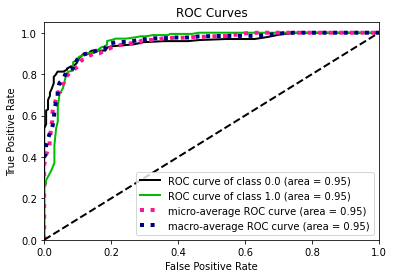

In [104]:
#roc curve
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,probes)
plt.show()

In [105]:
#importing library for roc_auc curve
from sklearn.metrics import roc_auc_score

In [106]:
#score
roc_auc_score(y_test,predrf)

0.877519941986947

In [108]:
#implementing lasso regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso = Lasso()

In [109]:
parameters = {"alpha":[15, 10, 35, 40, 13, 24, 17, 50, 11, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(x, y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [15, 10, 35, 40, 13, 24, 17, 50, 11, 20]},
             scoring='neg_mean_squared_error')

In [110]:
print(lasso_regression.best_params_)

{'alpha': 10}


In [111]:
print(lasso_regression.best_score_)

-0.18188522131705537


In [113]:
#calculating crosss validation score
from sklearn.model_selection import cross_val_score
scr = cross_val_score(log_reg,x,y,cv=5)
print(scr.mean())

0.7543147208121829


In [114]:
#calculating crosss validation score
from sklearn.model_selection import cross_val_score
scr = cross_val_score(clf,x,y,cv=5)
print(scr.mean())

0.7715736040609136


In [115]:
#calculating crosss validation score
from sklearn.model_selection import cross_val_score
scr = cross_val_score(rf,x,y,cv=5)
print(scr.mean())

0.7685279187817259


In [107]:
# saving the model
import pickle

from sklearn import model_selection
filename = 'insurense.sav'
pickle.dump(data, open(filename, 'wb'))